Goals:
* To build  autoencoder with Keras, using Dense layers in Keras and apply it to 
  * the MNIST dataset and 
  * the fashion MNIST dataset


Import libraries & packages

In [1]:
# general libraries
import numpy as np
import pandas as pd
import time
import sys
import matplotlib.pyplot as plt

# tensorflow libraries
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# sklearn libraries
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
# import MNIST Data
from keras.datasets import mnist

(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# normalise train & test data
mnist_x_train = mnist_x_train.astype('float32') / 255.
mnist_x_test = mnist_x_test.astype('float32') / 255.

# reshape
mnist_x_train = mnist_x_train.reshape((len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_test = mnist_x_test.reshape((len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

A simple autoencoder consists of: an _encoder_ and a _decoder_. 
The function ```create_autoencoders()``` is created using Keras to perform the job of autoencoder with the following parts as separate models:

- the encoder 
- the decoder
- the complete model that includes an encoder and decoder

Use functional API in Keras to achieve the same.

In [4]:
def create_autoencoders(feature_layer_dim = 16):

  input_img = Input(shape = (784,), name = 'Input_Layer')
  # 784 is the total number of pixels of MNIST images
  
  # The layer encoded has a dimension equal to feature_layer_dim and contains
  # the encoded input (therefore the name)
  encoded = Dense(feature_layer_dim, activation = 'relu', name = 'Encoded_Features')(input_img)
  decoded = Dense(784, activation = 'sigmoid', name = 'Decoded_Input')(encoded)

  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)

  encoded_input = Input(shape = (feature_layer_dim,))
  decoder = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder(encoded_input))

  return autoencoder, encoder, decoder

Create an autoencoder with the layer dimensions of $(784, 16, 784)$.

In [5]:
# 16 is the number of latent features of our autoencoder
autoencoder, encoder, decoder = create_autoencoders(16) 

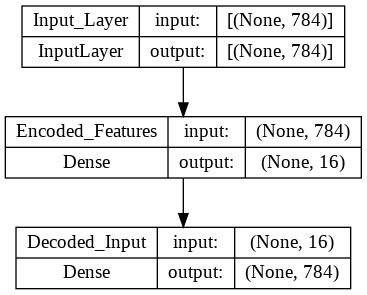

In [6]:
# Check the model of created autoencoder
keras.utils.plot_model(autoencoder, show_shapes = True)

In [7]:
# Complie & Fit the Autoencoder model
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = autoencoder.fit(mnist_x_train, mnist_x_train,
                          epochs = 30,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (mnist_x_test, mnist_x_test),
                          verbose = 0)

In [10]:
# Extract the encoded & decoded images from the MNIST Test data
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


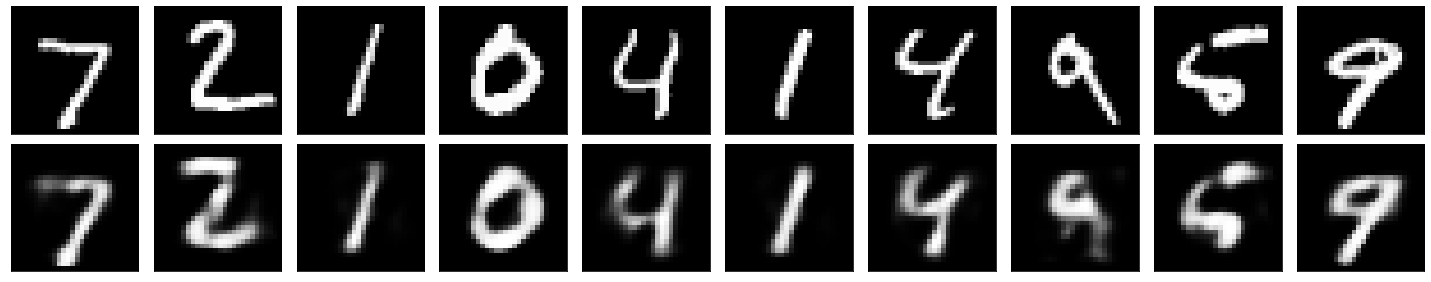

In [11]:
# Analyse the reconstructed image
n = 10  # how many digits we will display

fig = plt.figure(figsize = (20, 4))

for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

## Practice
* Create an autoencoders with the layer dimensions of $(784, 32, 784)$ and $(784, 64, 784)$ for MNIST dataset.
* Check the reconstructed images and make observations.
* Use the Fashion MNIST data as given in the cell below and apply autoencoder with layer dimensions of $(784, 16, 784)$,  $(784, 32, 784)$ and $(784, 64, 784)$
* Check the reconstructed images and make observations.

In [8]:
# Load Fashion MNIST data set
from keras.datasets import fashion_mnist

(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()

# Normalize
fashion_x_train = fashion_x_train.astype('float32') / 255.
fashion_x_test = fashion_x_test.astype('float32') / 255.

#reshape
fashion_x_train = fashion_x_train.reshape((len(fashion_x_train), np.prod(fashion_x_train.shape[1:])))
fashion_x_test = fashion_x_test.reshape((len(fashion_x_test), np.prod(fashion_x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step
